In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numba
from scipy.linalg import eigh, sqrtm, pinv

from klap import (
    rbf_kernel,
    rbf_laplacian,
    exp_kernel,
    exp_laplacian
)

from rates.datasets import halfmoon

np.random.seed(100)

"Maybe would be better to use pytorch rather than numba, to have compatibility on CPU and GPU"

'Maybe would be better to use pytorch rather than numba, to have compatibility on CPU and GPU'

In [9]:
n = 10000
# x = np.random.randn(n, 1)
# x *= np.sqrt(.1)
x = np.random.normal(0, np.sqrt(.1), n)[:, np.newaxis]
x_repr = x[:500]
sigma = 1
kernel = rbf_kernel

K = kernel(x_repr, x, sigma=sigma)
L = rbf_laplacian(x_repr, x, sigma=sigma, K=K)

R = K @ K.T
L /= n
R /= n

In [11]:
w, v = eigh(R, L + 1e-6 * np.eye(len(L)))
print(w)

[-1.83841790e-08 -9.91290856e-09 -9.86439433e-09 -9.70628359e-09
 -9.36792206e-09 -9.29341229e-09 -9.28091744e-09 -9.17203620e-09
 -9.10257450e-09 -8.99028606e-09 -8.85319643e-09 -8.77683162e-09
 -8.70817475e-09 -8.66005214e-09 -8.55593708e-09 -8.51522814e-09
 -8.48684023e-09 -8.42573110e-09 -8.35246854e-09 -8.28886051e-09
 -8.25879612e-09 -8.16155310e-09 -8.11789882e-09 -8.04427906e-09
 -7.98581428e-09 -7.96781583e-09 -7.91076641e-09 -7.84426337e-09
 -7.80723735e-09 -7.77346952e-09 -7.69832935e-09 -7.65262156e-09
 -7.53956056e-09 -7.53306141e-09 -7.48103867e-09 -7.45160603e-09
 -7.34971321e-09 -7.25528111e-09 -7.24114873e-09 -7.18416906e-09
 -7.15830438e-09 -7.11489298e-09 -7.07946965e-09 -7.02539786e-09
 -6.96147118e-09 -6.90950116e-09 -6.84406913e-09 -6.79605542e-09
 -6.73506988e-09 -6.69628386e-09 -6.67558434e-09 -6.60575499e-09
 -6.56331888e-09 -6.46029798e-09 -6.45773990e-09 -6.40676587e-09
 -6.40149500e-09 -6.35838281e-09 -6.33218696e-09 -6.29188604e-09
 -6.24232268e-09 -6.17144

In [12]:
x_test = np.linspace(-.75, .75, num=1000)
k_test = kernel(x_test[:, np.newaxis], x_repr, sigma=sigma)
y_test = k_test @ v
y_test /= np.sqrt(np.mean(y_test**2, axis=0))


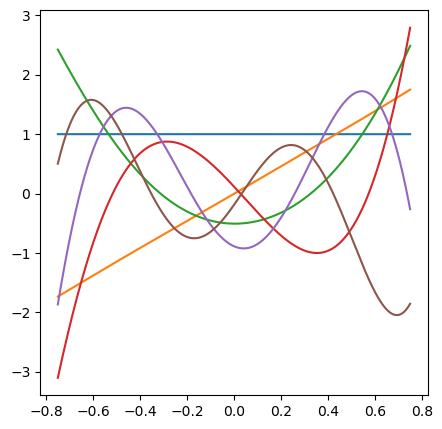

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(6):
    ax.plot(x_test, y_test[:,-i-1])

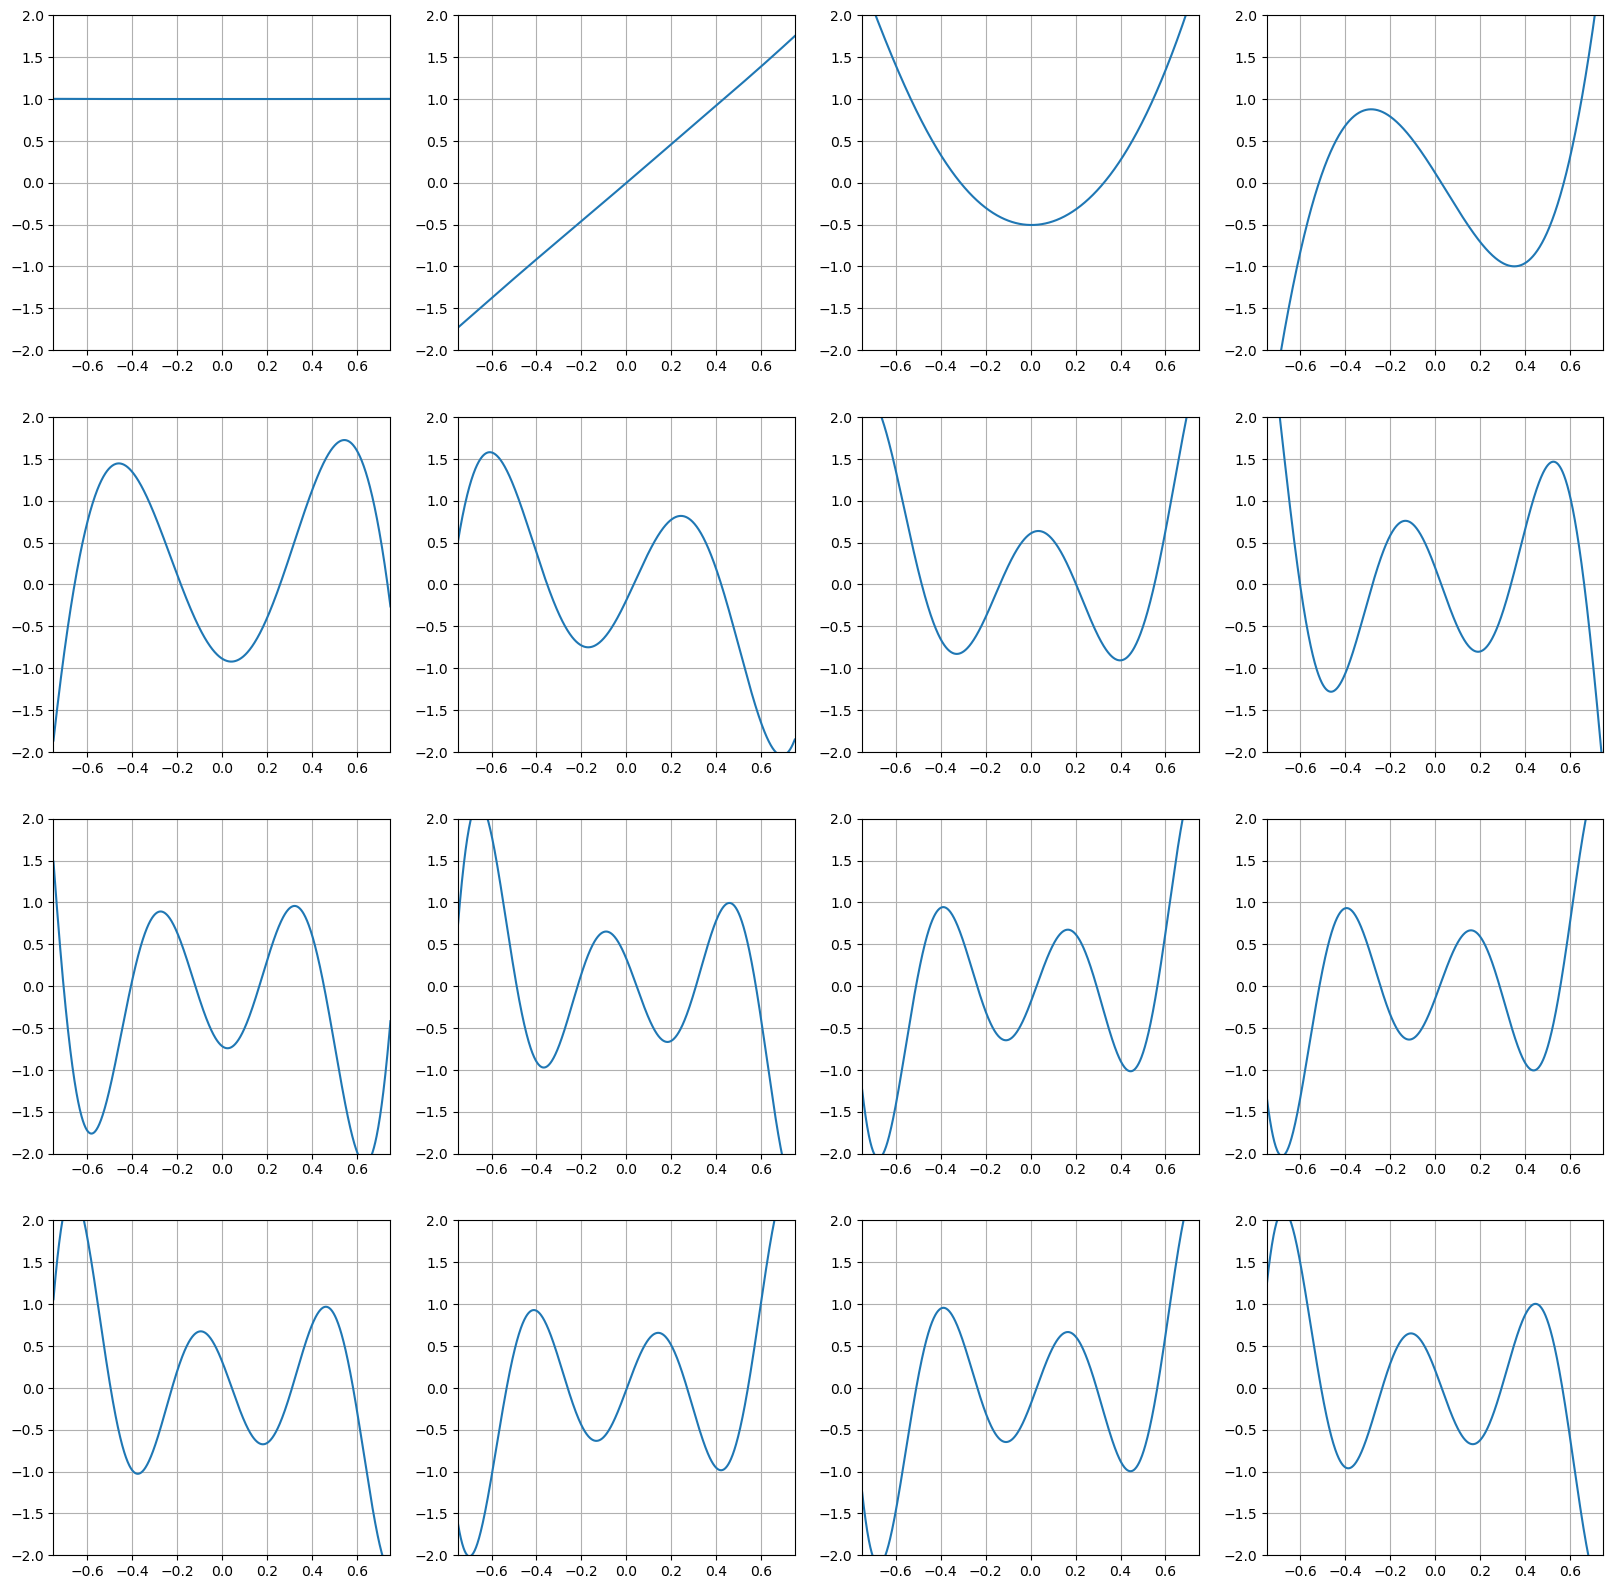

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(16):
    # ax.plot(x_test, y_test[:,-i-1] * i**2)
    axes[i//4, i%4].plot(x_test, y_test[:, -i-1], color='C0')
    axes[i//4, i%4].grid(True)
    axes[i//4, i%4].set_xlim(-.75, .75)
    axes[i//4, i%4].set_ylim(-2, 2)

NameError: name 'T' is not defined

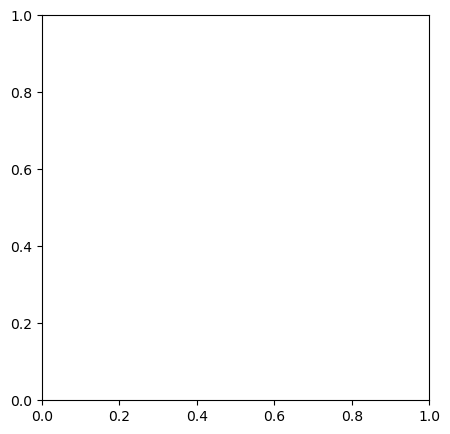

In [9]:
# fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(6):
    y = k_test.T @ T @ v.T[-i-1]
    # y = k_test.T @ eig[:, -i-1]
    ax.plot(x_test, y * i**2)
# ax.set_xlim(-.75, .75)
# ax.set_ylim(-2, 2)
    # axes[i//4, i%4].plot(x_test, y, color='C0')
    # axes[i//4, i%4].grid(True)
    # axes[i//4, i%4].plot(x_display, y)
    # axes[i//4, i%4].tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
    # axes[i//4, i%4].set_xticks([])
    # axes[i//4, i%4].set_yticks([])

In [ ]:
(k_test.T @ eig).shape

(1000, 10)

In [ ]:
n = 1000
x = halfmoon(n, noise_level=0)
# x = np.random.randn(n, 2)
num = 500
X, Y = np.meshgrid(np.linspace(-1.5, 1.5, num=num), np.linspace(-1.5, 2.5, num=num))
# X, Y = np.meshgrid(np.linspace(-5, 5, num=num), np.linspace(-5, 5, num=num))
x_display = np.vstack((X.flatten(), Y.flatten())).T

# x = np.linspace(0, 1, num=n)[:, np.newaxis]
# x_display = np.linspace(-1, 2, num=500)[:, np.newaxis]

In [ ]:
p = 100
x_repr = x[:p]
# x_repr = halfmoon(p, noise_level=.1)
x_repr = x 
p = len(x_repr)

In [ ]:
sigma = .5

kernel = rbf_kernel
_laplacian = _rbf_laplacian
norm = 4 / (sigma**4)

# kernel = exp_kernel
# _laplacian = _exp_laplacian
# norm = 1 / sigma**2

In [ ]:
# Laplacian operators
L, K = laplacian(kernel, sigma, x_repr, x, _laplacian, norm)

# Nystrom regularization
K_in = kernel(x_repr, x_repr, sigma=sigma)
R = K @ K.T

L /= n
R /= n

K_test = rbf_kernel(x_display, x_repr, sigma)

In [ ]:
tmp = sqrtm(pinv(R, atol=1e-6))
T = tmp.T @ (L.T + L) @ tmp / 2

In [ ]:
# w, v = eigh(L + 1e3 * n * K_in + 1e-6*np.eye(len(L)), R + 1e-6 * np.eye(len(R)))
w, v = eigh(T)

In [ ]:
v_pos = v[w > 0]
print(w.min(), w.max(), (w < 0).sum(), (w > 0).mean())

-5.444824245783839e-07 701.5608029264882 486 0.514


/home/vivc/Code/conda/envs/dev/lib/python3.10/site-packages/numpy/ma/core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


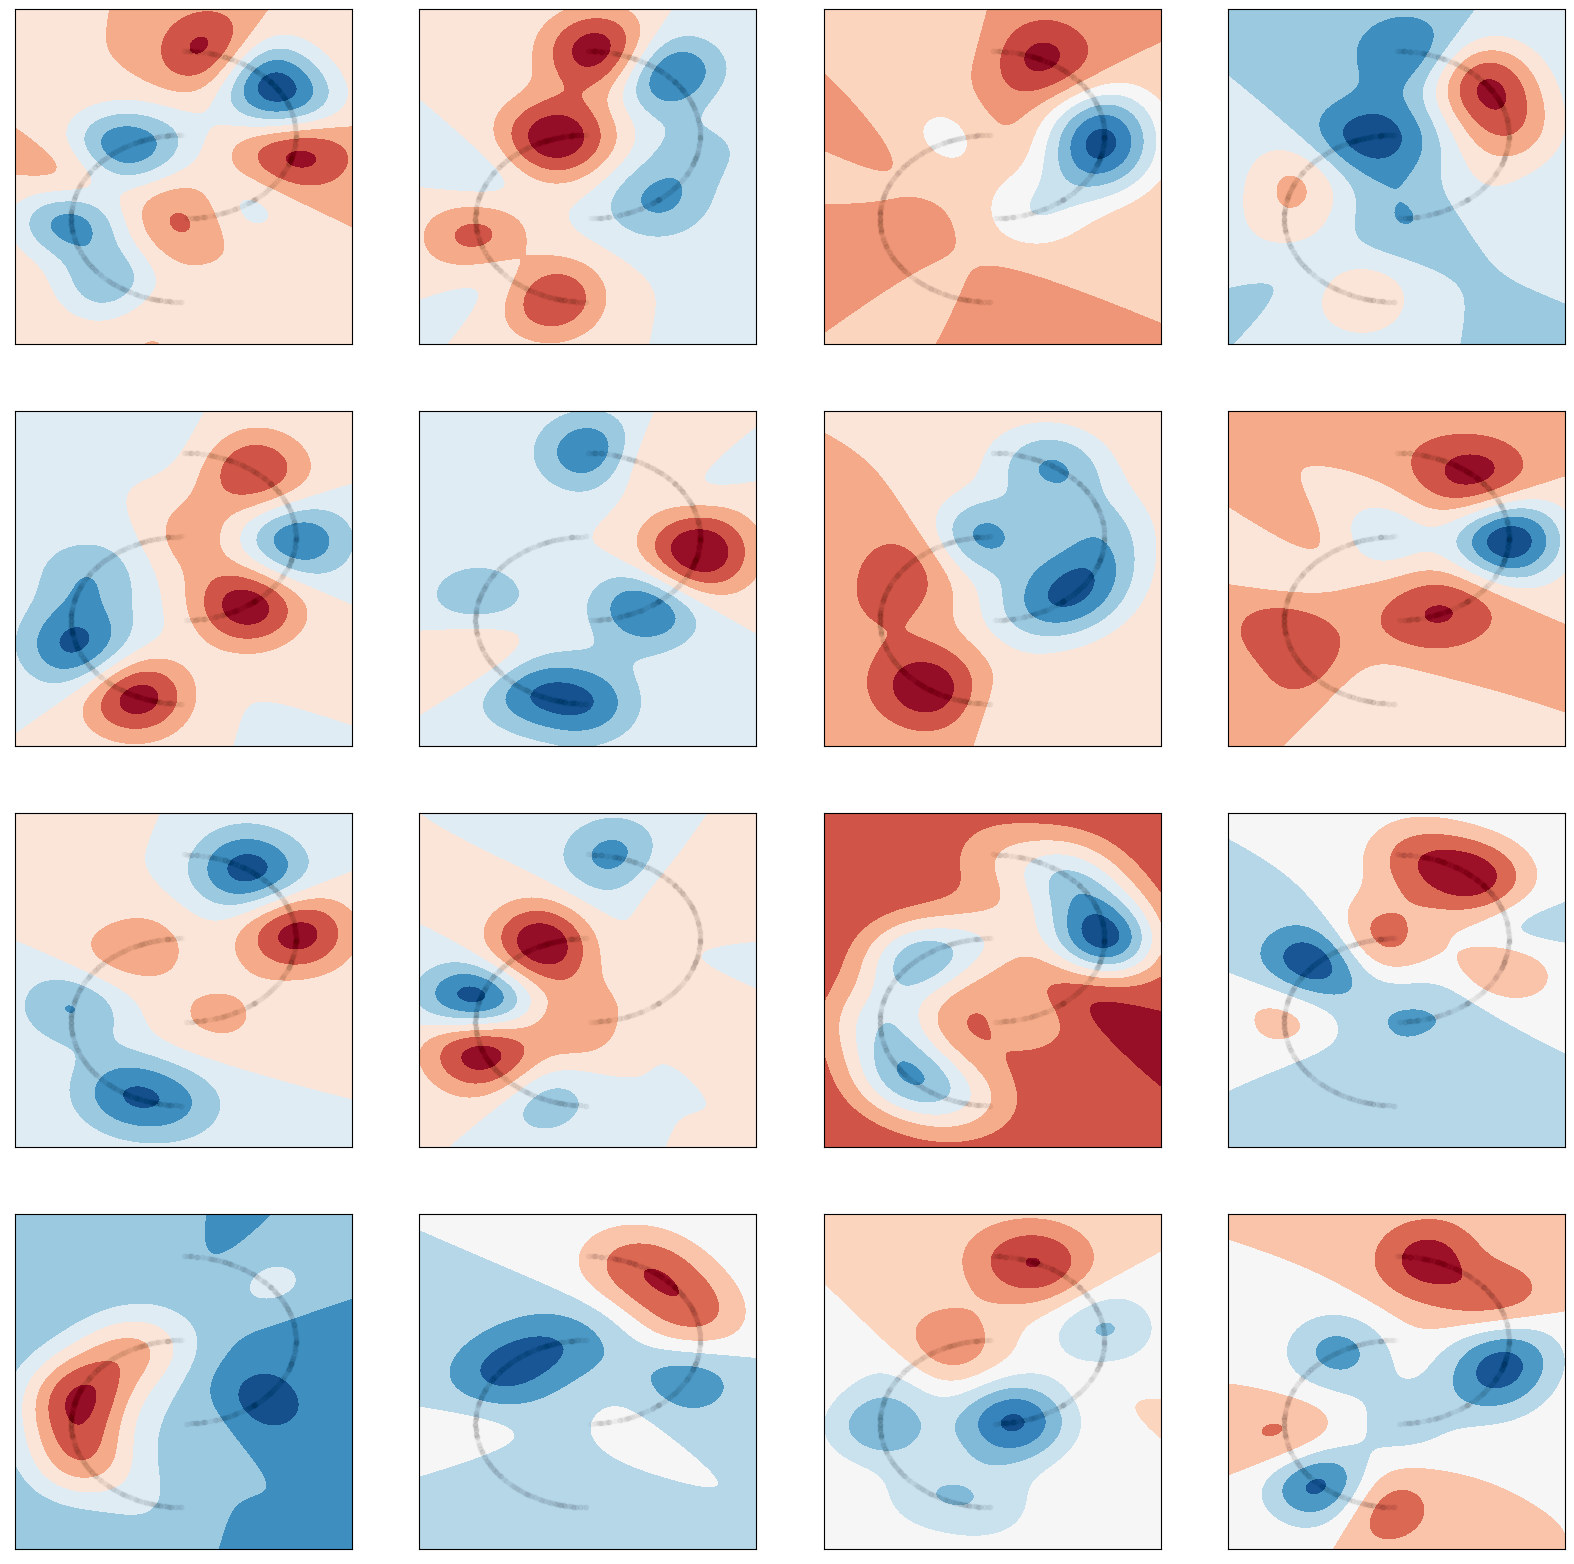

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i in range(16):
    y = K_test @ v_pos[i]
    # y = K_test @ v[-i-1]

    axes[i//4, i%4].contourf(X, Y, y.reshape(*X.shape), cmap='RdBu_r')
    axes[i//4, i%4].scatter(x[:, 0], x[:, 1], alpha=.01, s=10, c='k')
    # axes[i//4, i%4].plot(x_display, y)
    axes[i//4, i%4].tick_params(axis="both", which="major", labelleft=False, labelbottom=False)
    axes[i//4, i%4].set_xticks([])
    axes[i//4, i%4].set_yticks([])

In [ ]:
w

array([-5.44482425e-07, -4.57398705e-07, -2.55124916e-07, -2.13322949e-07,
       -1.70981764e-07, -1.45242114e-07, -1.38440025e-07, -1.18875769e-07,
       -1.13642621e-07, -1.01954772e-07, -9.52781577e-08, -8.78664685e-08,
       -8.12778024e-08, -7.62752461e-08, -7.44379630e-08, -6.92879863e-08,
       -6.53463185e-08, -6.23037794e-08, -6.02645733e-08, -5.74790287e-08,
       -5.54779830e-08, -4.96858495e-08, -4.78353071e-08, -4.59601928e-08,
       -4.38880634e-08, -4.33100730e-08, -4.07627830e-08, -3.92924026e-08,
       -3.85969145e-08, -3.68042656e-08, -3.59008576e-08, -3.48220913e-08,
       -3.36845800e-08, -3.20949579e-08, -3.06152637e-08, -2.99474207e-08,
       -2.87681403e-08, -2.84751623e-08, -2.74964840e-08, -2.69702940e-08,
       -2.65526766e-08, -2.60309996e-08, -2.51128541e-08, -2.46470137e-08,
       -2.38843159e-08, -2.35385729e-08, -2.32849903e-08, -2.24500810e-08,
       -2.18339531e-08, -2.12926203e-08, -2.07080115e-08, -2.02555685e-08,
       -2.00267703e-08, -